In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("D:\Program Files\EnerjiSA_DS_Bootcamp\HW2/train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = df[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('category')

In [4]:
for col in df.columns :
    if df[col].dtype == 'object' :
        df[col] = df[col].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [7]:
df=df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

D:\Program Files\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BuiltAge', ylabel='Density'>

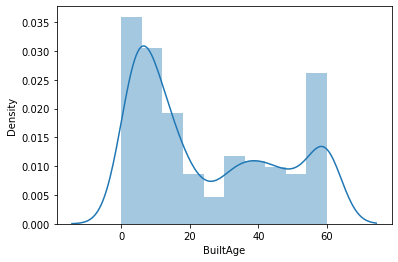

In [8]:
df['YearRemodAdd'] = 2010 - df['YearRemodAdd']
df = df.rename(columns={'YearRemodAdd': 'BuiltAge'})
sns.distplot(df['BuiltAge'])

<AxesSubplot:>

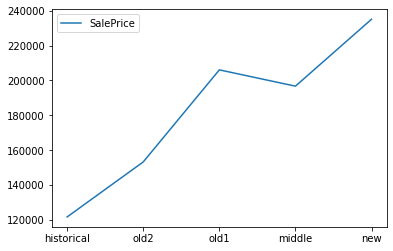

In [12]:
df_historical = df [ df ['BuiltAge'] > 50]
df_old2 = df [ (df ['BuiltAge'] <= 50) & (20 < df ['BuiltAge'])]
df_old1 = df [ (df ['BuiltAge'] <= 20) & (10 < df ['BuiltAge'])]
df_middle = df [ (df ['BuiltAge'] <= 10) & (5 < df ['BuiltAge'])]
df_new = df [ (df ['BuiltAge'] <= 5) & (0 <= df ['BuiltAge'])]

a = df_historical.SalePrice.mean()
b = df_old2.SalePrice.mean()
c = df_old1.SalePrice.mean()
d = df_middle.SalePrice.mean()
e = df_new.SalePrice.mean()

dict ={ "historical" : [a] , "old2" : [b] , "old1" : [c] , "middle" : [d] , "new" : [e]}

builtAge = pd.DataFrame(dict).T
builtAge = builtAge.rename(columns = {0 :"SalePrice"})
sns.lineplot(data = builtAge)

SpearmanrResult(correlation=-0.5711589780582343, pvalue=3.557233443898463e-127)

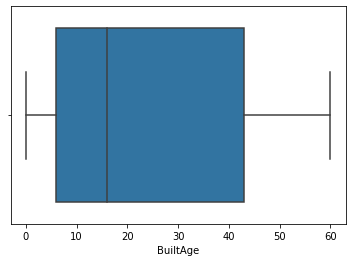

In [13]:
sns.boxplot(data = df , x= 'BuiltAge' )
stats.spearmanr(df['BuiltAge'],df['SalePrice'])

<AxesSubplot:xlabel='BuiltAge', ylabel='SalePrice'>

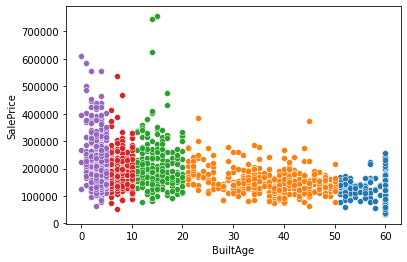

In [11]:
sns.scatterplot(data = df_historical , x= 'BuiltAge' , y ='SalePrice')
sns.scatterplot(data = df_old2 , x= 'BuiltAge' , y ='SalePrice')
sns.scatterplot(data = df_old1 , x= 'BuiltAge' , y ='SalePrice')
sns.scatterplot(data = df_middle , x= 'BuiltAge' , y ='SalePrice')
sns.scatterplot(data = df_new , x= 'BuiltAge' , y ='SalePrice')

<AxesSubplot:xlabel='BuiltAge', ylabel='SalePrice'>

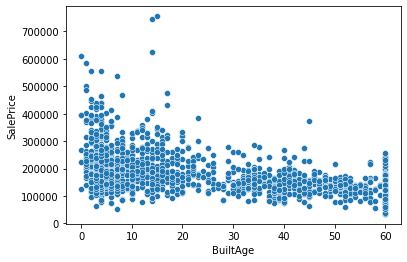

In [14]:
sns.scatterplot(data = df , x= 'BuiltAge' , y ='SalePrice')

In [ ]:
sns.distplot(df["SalePrice"])

In [ ]:
sns.pairplot(df[["YearBuilt","SalePrice"]])

In [ ]:
df_new = df.iloc[ : , 1:-1]
df_new.head()


In [ ]:
for col in df_new.columns :
    spearman_rank_coeff1 = stats.spearmanr(df[col],df['SalePrice'])
    if spearman_rank_coeff1[0] > 0.6 :
        print("Corr value between " + str(col) + " - SalePrice is : " + str(spearman_rank_coeff1))

In [ ]:
for col in df_new.columns :
    spearman_rank_coeff1 = stats.spearmanr(df[col],df['SalePrice'])
    if  0.4 <= spearman_rank_coeff1[0] <= 0.6 :
        print("Corr value between " + str(col) + " - SalePrice is : " + str(spearman_rank_coeff1))

In [ ]:
for col in df_new.columns :
    spearman_rank_coeff1 = stats.spearmanr(df[col],df['SalePrice'])
    if -0.4 <= spearman_rank_coeff1[0] <   0.4 :
        print("Corr value between " + str(col) + " - SalePrice is : " + str(spearman_rank_coeff1))

In [ ]:
for col in df_new.columns :
    spearman_rank_coeff1 = stats.spearmanr(df[col],df['SalePrice'])
    if spearman_rank_coeff1[0] < - 0.4 :
        print("Corr value between " + str(col) + " - SalePrice is : " + str(spearman_rank_coeff1))

In [ ]:
corrs = []

for col in df_new.columns :
    corr = spearman_rank_coeff1 = stats.spearmanr(df[col],df['SalePrice'])[0]
    corrs.append(corr)
    
corr_df = pd.DataFrame(corrs)
sns.distplot(corr_df)


In [ ]:
df_corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [ ]:
X_train = df.select_dtypes(include=['number']).copy()
X_train = X_train.drop(['SalePrice'], axis=1)
y_train = df["SalePrice"]
# fill in any missing data with the mean value
X_train = X_train.fillna(X_train.mean())
print(X_train.shape[1])

In [ ]:
std      = np.std(X_train, axis=0)
X_train /= std

In [ ]:
from sklearn import linear_model
regressor = linear_model.Lasso(alpha=100,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
regressor.fit(X_train, y_train)

In [ ]:
import eli5
eli5.show_weights(regressor, top=-1, feature_names = X_train.columns.tolist())

In [ ]:
from xgboost import XGBRegressor
from matplotlib import pyplot

model_list = []
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print((i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()